# **데이터 전처리**

* ## 넘파이로 데이터 준비하기
[도미와 빙어 데이터](https://bit.ly/bream_smelt)

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

넘파이의 column_stack( ) 함수는 전달받은 리스트를<br>
일렬로 세운 다음 차례대로 나란히 연결함.<br><br>
(중요) 이때 연결할 리스트는 <u>**튜플**</u>로 전달함.

In [3]:
np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [5]:
fish_data = np.column_stack((fish_length,fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


이와 같이 잘 연결된 것을 볼 수 있음.<br><br>
타깃 데이터는 [1]과 [0]을 여러 번 곱해서 만들었었음.<br>
하지만 넘파이 함수로 간편하게 만들 수 있음.

In [6]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


이렇게 np.ones( )와 np.zeros( )로 0과 1의 배열을 쉽게 만들 수 있음.<br><br>
이번엔 column_stack( )과 다르게 세로로 세우지 않고<br>
그대로 연장하게 도와주는 함수를 사용 할 것임.<br>
바로 concatenate( )임.

In [8]:
fish_target = np.concatenate((np.ones(35),np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


* ## 사이킷런으로 훈련 세트와 테스트 세트 나누기
앞에선 직접 섞어서 train set과 test set으로 나누었지만<br>
더 간편하게 train_test_split( )함수를 사용할 것임.

In [9]:
from sklearn.model_selection import train_test_split

In [13]:
train_input,test_input,train_target,test_target=train_test_split(fish_data,fish_target,random_state=42)
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)
print(test_target)

(36, 2) (13, 2)
(36,) (13,)
[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


결과를 보면 알 수 있듯이 도미와 빙어가 잘 섞였음.<br>
하지만 비율이 맞지않아 샘플링 편향이 일어날 수 있음.<br><br>
따라서 비율을 유지시켜 주기위해 stratify 변수를 설정해줌.

In [15]:
train_input,test_input,train_target, test_target = train_test_split(fish_data, fish_target,stratify=fish_target,random_state=42)
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


* ## 수상한 도미 한 마리
k_최근접 이웃으로 훈련함.

In [17]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input,test_target)

1.0

In [18]:
print(kn.predict([[25,150]]))

[0.]


답이 틀리다..<br>
원인을 찾기 위해 산점도를 그림.

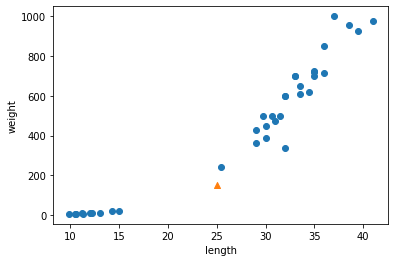

In [19]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

그림을 보면 분명 도미와 가깝지만 왜 빙어로 예측 했을까.<br>
주변에 있다고 계산한 5개의 데이터를 표시하자.<br>
kn.kneighbors( )함수를 이용하면 쉽게 구할 수 있음.

In [ ]:
distances,indexes=kn.kneighbors([[25,150]])
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlabel()